<a href="https://colab.research.google.com/github/RavinduP/Product_Success/blob/Market_demand_forecasting/featureengineeringxgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [ ]:
# Load the dataset
file_path = 'Ladders updated data.xlsx'
data = pd.ExcelFile(file_path)

# Load the 'Data' sheet
df = data.parse('Data')

# Display the first few rows to understand the structure
print("First 5 rows of the dataset:")
print(df.head())



First 5 rows of the dataset:
  Billing Date  Net Weight Sales Region  Invoice Value      Material Code  \
0   2023-02-08    0.010106           EX          71.50  FAML0504N000N2000   
1   2022-09-22    0.005570           R2       10732.17  FASL3000M001L0700   
2   2022-09-22    0.004850           R2        9202.18  FASL3000M001L0600   
3   2022-09-22    0.007850           R2       15373.92  FASL2000M001N0800   
4   2022-10-16    0.004850           R2        9202.18  FASL3000M001L0600   

                   Size  QTY(EA)  
0  Multy Purpose Ladder        1  
1           STEP LADDER        1  
2           STEP LADDER        1  
3           STEP LADDER        1  
4           STEP LADDER        1  


In [ ]:
# Check basic information about the dataset
print("\nDataset Information:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7660 entries, 0 to 7659
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Billing Date   7660 non-null   datetime64[ns]
 1   Net Weight     7660 non-null   float64       
 2   Sales Region   7660 non-null   object        
 3   Invoice Value  7660 non-null   float64       
 4   Material Code  7660 non-null   object        
 5   Size           7660 non-null   object        
 6   QTY(EA)        7660 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 419.0+ KB

Missing Values:
Billing Date     0
Net Weight       0
Sales Region     0
Invoice Value    0
Material Code    0
Size             0
QTY(EA)          0
dtype: int64


In [ ]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                        Billing Date   Net Weight  Invoice Value      QTY(EA)
count                           7660  7660.000000   7.660000e+03  7660.000000
mean   2023-10-20 03:02:09.712793856     4.729594   4.328887e+04     3.665144
min              2022-04-28 00:00:00  -107.280000  -3.520716e+06   -78.000000
25%              2023-05-16 18:00:00     0.005570   7.741040e+03     1.000000
50%              2023-11-30 00:00:00     0.010106   1.679306e+04     1.000000
75%              2024-04-19 00:00:00     0.039250   3.049486e+04     2.000000
max              2024-10-31 00:00:00  1050.000000   3.520716e+06   173.000000
std                              NaN    30.823669   1.404670e+05     9.967725


In [ ]:
# Check unique values in categorical columns
categorical_cols = ['Sales Region', 'Material Code', 'Size', 'QTY(EA)']
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in Sales Region:
['EX' 'R2' 'R1' 'R8' 'R7' 'R5' 'DR' 'R4' 'R6' 'PR' 'R3' 'PR-EX']

Unique values in Material Code:
['FAML0504N000N2000' 'FASL3000M001L0700' 'FASL3000M001L0600'
 'FASL2000M001N0800' 'FASL3000M001L0500' 'FASL3000M001L0400'
 'FASL2000M001N0900' 'FASL2000M001N1000' 'FAML0304M001N1200'
 'FASL3000M001L0800' 'FAML0304N000N1200' 'FAML0404N000N1600'
 'FASL3000M000L0600' 'FASL2000M000N0800' 'FASL2000M000N0900'
 'FASL2000M000N1000' 'FASL3000M000L0400' 'FASL3000M000L0500'
 'FASL3000M000L0700']

Unique values in Size:
['Multy Purpose Ladder' 'STEP LADDER']

Unique values in QTY(EA):
[  1   3   2   4   5  -5  -1   6  10  25  20  13  11   7  12  -3  -2  45
  58   9  -7 -11  30  16   8  18  24  19  26  15  14  -4 -10  -6 -20 100
  50 102  48  67 150 104  65  75  17  59 141 173  40 -17  70  36  78  22
  99  32  28  29 116  80  54  52  90  60 -78 -45 -33 -34 -18 -37 -24  -8
 -23  -9  27  35  39  33  37  46  43  51  56  73 -15 -13 153  23 -12  21
  34  31]


In [ ]:
print(df.columns)

Index(['Billing Date', 'Net Weight', 'Sales Region', 'Invoice Value',
       'Material Code', 'Size', 'QTY(EA)'],
      dtype='object')


In [ ]:
# Drop unnecessary columns
df = df.drop(columns=["Net Weight", "Invoice Value","Material Code"]) # Removed 'Material Code' from the list
print(df.head())

  Billing Date Sales Region                  Size  QTY(EA)
0   2023-02-08           EX  Multy Purpose Ladder        1
1   2022-09-22           R2           STEP LADDER        1
2   2022-09-22           R2           STEP LADDER        1
3   2022-09-22           R2           STEP LADDER        1
4   2022-10-16           R2           STEP LADDER        1


In [ ]:
df = df[df['QTY(EA)'] > 0]
print(df.head())

  Billing Date Sales Region                  Size  QTY(EA)
0   2023-02-08           EX  Multy Purpose Ladder        1
1   2022-09-22           R2           STEP LADDER        1
2   2022-09-22           R2           STEP LADDER        1
3   2022-09-22           R2           STEP LADDER        1
4   2022-10-16           R2           STEP LADDER        1


In [ ]:
categorical_cols = ['QTY(EA)']
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in QTY(EA):
[  1   3   2   4   5   6  10  25  20  13  11   7  12  45  58   9  30  16
   8  18  24  19  26  15  14 100  50 102  48  67 150 104  65  75  17  59
 141 173  40  70  36  78  22  99  32  28  29 116  80  54  52  90  60  27
  35  39  33  37  46  43  51  56  73 153  23  21  34  31]


In [ ]:
print(df.iloc[40:56])  # Includes row 45 up to 55


   Billing Date Sales Region         Size  QTY(EA)
40   2022-09-17           R2  STEP LADDER        1
41   2022-09-17           R2  STEP LADDER        1
42   2023-02-28           R8  STEP LADDER        4
43   2023-02-28           R8  STEP LADDER        5
45   2023-03-09           R8  STEP LADDER        5
46   2023-03-09           R8  STEP LADDER        2
47   2023-03-09           R8  STEP LADDER        5
50   2022-09-30           R8  STEP LADDER        3
51   2022-09-30           R8  STEP LADDER        5
52   2022-09-30           R8  STEP LADDER        5
53   2022-09-30           R8  STEP LADDER        2
54   2022-09-30           R8  STEP LADDER        2
55   2022-09-30           R8  STEP LADDER        2
56   2022-09-30           R8  STEP LADDER        5
57   2022-09-30           R8  STEP LADDER        5
58   2022-09-30           R8  STEP LADDER        5


In [ ]:
# Extract time-based features
df['Year'] = df['Billing Date'].dt.year
df['Month'] = df['Billing Date'].dt.month
df['Day'] = df['Billing Date'].dt.day
df['Weekday'] = df['Billing Date'].dt.weekday
df['Quarter'] = df['Billing Date'].dt.quarter

# Display updated dataset
print("\nDataset after adding time-based features:")
print(df.head())


Dataset after adding time-based features:
  Billing Date Sales Region                  Size  QTY(EA)  Year  Month  Day  \
0   2023-02-08           EX  Multy Purpose Ladder        1  2023      2    8   
1   2022-09-22           R2           STEP LADDER        1  2022      9   22   
2   2022-09-22           R2           STEP LADDER        1  2022      9   22   
3   2022-09-22           R2           STEP LADDER        1  2022      9   22   
4   2022-10-16           R2           STEP LADDER        1  2022     10   16   

   Weekday  Quarter  
0        2        1  
1        3        3  
2        3        3  
3        3        3  
4        6        4  


In [ ]:
# Drop the original date column
df = df.drop(columns=["Billing Date"])
print(df.head())


  Sales Region                  Size  QTY(EA)  Year  Month  Day  Weekday  \
0           EX  Multy Purpose Ladder        1  2023      2    8        2   
1           R2           STEP LADDER        1  2022      9   22        3   
2           R2           STEP LADDER        1  2022      9   22        3   
3           R2           STEP LADDER        1  2022      9   22        3   
4           R2           STEP LADDER        1  2022     10   16        6   

   Quarter  
0        1  
1        3  
2        3  
3        3  
4        4  


In [ ]:
# Map region codes to region names
region_mapping = {
    "R1": "North", "R2": "Kandy", "R3": "Kurunagela", "R4": "Southern", "R5": "Negombo",
    "R6": "East", "R7": "Colombo", "R8": "Key Accounts", "PR": "Projects", "PR-EX": "Projects Export",
    "EX": "Exports", "DR": "Direct"
}

# Replace Sales Region codes with actual names
df["Sales Region"] = df["Sales Region"].replace(region_mapping)

# Verify changes
print(df["Sales Region"].unique())

['Exports' 'Kandy' 'North' 'Key Accounts' 'Colombo' 'Negombo' 'Direct'
 'Southern' 'East' 'Projects' 'Kurunagela' 'Projects Export']


In [ ]:
print(df.head())

  Sales Region                  Size  QTY(EA)  Year  Month  Day  Weekday  \
0      Exports  Multy Purpose Ladder        1  2023      2    8        2   
1        Kandy           STEP LADDER        1  2022      9   22        3   
2        Kandy           STEP LADDER        1  2022      9   22        3   
3        Kandy           STEP LADDER        1  2022      9   22        3   
4        Kandy           STEP LADDER        1  2022     10   16        6   

   Quarter  
0        1  
1        3  
2        3  
3        3  
4        4  


In [ ]:
print(df.isnull().sum())  # Check if any column has missing values


Sales Region    0
Size            0
QTY(EA)         0
Year            0
Month           0
Day             0
Weekday         0
Quarter         0
dtype: int64


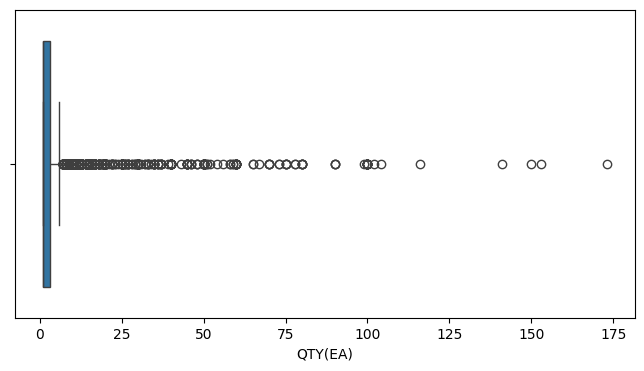

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.boxplot(x=df['QTY(EA)'])
plt.show()


In [ ]:

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['QTY(EA)'].quantile(0.25)
Q3 = df['QTY(EA)'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers = df[(df['QTY(EA)'] < lower_bound) | (df['QTY(EA)'] > upper_bound)]
num_outliers = outliers.shape[0]

print(f"Number of outliers in QTY(EA): {num_outliers}")

Number of outliers in QTY(EA): 822


In [ ]:
print(outliers.sort_values(by='QTY(EA)', ascending=False).head(10))  # Highest outliers
print(outliers.sort_values(by='QTY(EA)', ascending=True).head(10))   # Lowest outliers


     Sales Region                  Size  QTY(EA)  Year  Month  Day  Weekday  \
660        Direct           STEP LADDER      173  2022     10   22        5   
6062       Direct           STEP LADDER      153  2024      5   14        1   
646        Direct           STEP LADDER      150  2022      9   20        1   
659        Direct           STEP LADDER      141  2022     10   22        5   
1413       Direct  Multy Purpose Ladder      116  2022      6   22        2   
651        Direct           STEP LADDER      104  2022      9   29        3   
638        Direct           STEP LADDER      102  2022      6   21        1   
7502       Direct           STEP LADDER      100  2024     10    8        1   
7051       Direct           STEP LADDER      100  2024      8   27        1   
6999       Direct           STEP LADDER      100  2024      8   15        3   

      Quarter  
660         4  
6062        2  
646         3  
659         4  
1413        2  
651         3  
638         2  
75

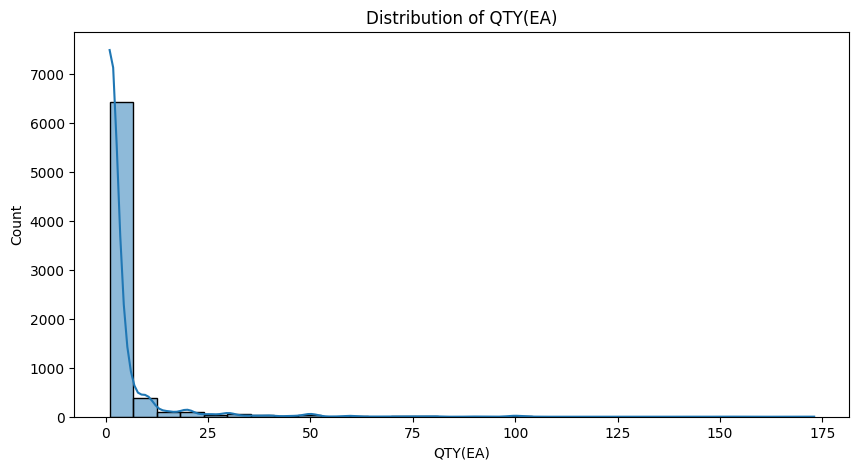

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df['QTY(EA)'], bins=30, kde=True)
plt.title("Distribution of QTY(EA)")
plt.show()


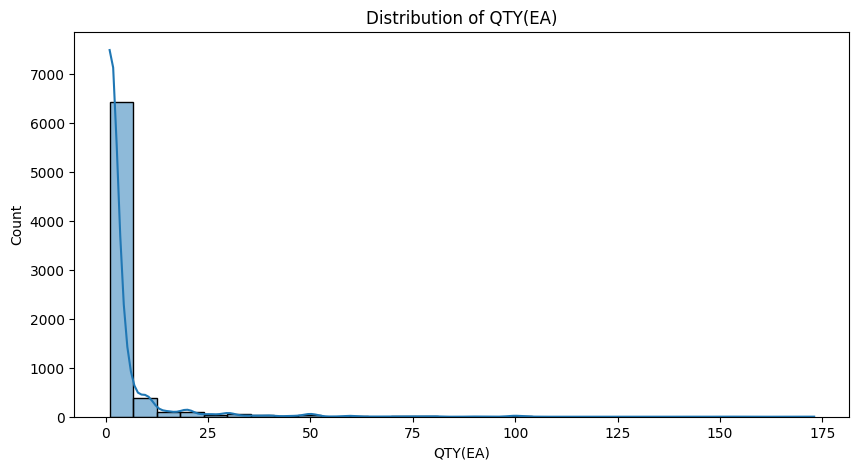

Summary Statistics for QTY(EA):
count    7249.000000
mean        4.040971
std        10.016094
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       173.000000
Name: QTY(EA), dtype: float64

Unique values in QTY(EA):
[  1   3   2   4   5   6  10  25  20  13  11   7  12  45  58   9  30  16
   8  18  24  19  26  15  14 100  50 102  48  67 150 104  65  75  17  59
 141 173  40  70  36  78  22  99  32  28  29 116  80  54  52  90  60  27
  35  39  33  37  46  43  51  56  73 153  23  21  34  31]

95th percentile threshold: 17.0
Number of values above the 95th percentile: 358


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['QTY(EA)'], bins=30, kde=True)
plt.title("Distribution of QTY(EA)")
plt.show()

# Get basic stats of QTY(EA)
print("Summary Statistics for QTY(EA):")
print(df['QTY(EA)'].describe())

# Checking for unique values, especially the higher peaks
print("\nUnique values in QTY(EA):")
print(df['QTY(EA)'].unique())

# Checking the number of outliers (values above 95th percentile)
upper_limit = df['QTY(EA)'].quantile(0.95)
print(f"\n95th percentile threshold: {upper_limit}")
print(f"Number of values above the 95th percentile: {len(df[df['QTY(EA)'] > upper_limit])}")


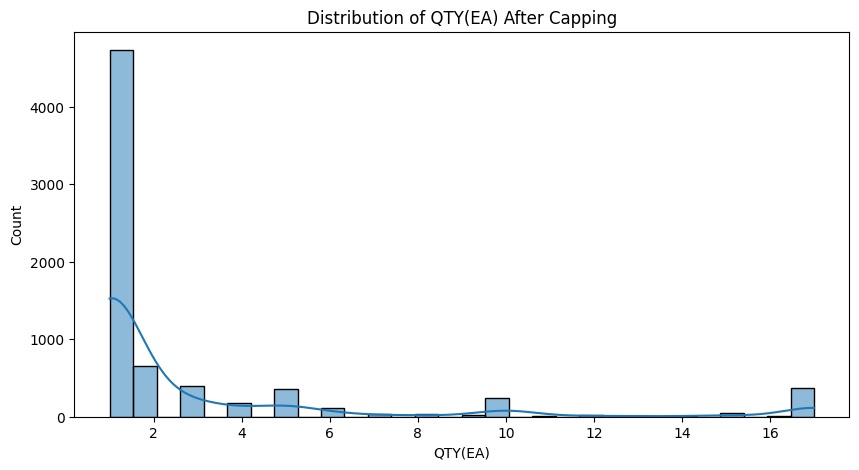

In [ ]:
# Cap values above the 95th percentile
df['QTY(EA)'] = df['QTY(EA)'].clip(upper=17)

# Plot the updated distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['QTY(EA)'], bins=30, kde=True)
plt.title("Distribution of QTY(EA) After Capping")
plt.show()


In [ ]:
# Print the summary statistics before capping
print("Summary Statistics before capping outliers:")
print(df['QTY(EA)'].describe())

# Check how many values are above the 95th percentile before capping
upper_limit = df['QTY(EA)'].quantile(0.95)
print(f"\n95th percentile threshold before capping: {upper_limit}")
print(f"Number of values above the 95th percentile before capping: {len(df[df['QTY(EA)'] > upper_limit])}")

# Cap values above the 95th percentile
df['QTY(EA)'] = df['QTY(EA)'].clip(upper=17)

# Print the summary statistics after capping
print("\nSummary Statistics after capping outliers:")
print(df['QTY(EA)'].describe())

# Check how many values are above the 95th percentile after capping
print(f"\nNumber of values above the 95th percentile after capping: {len(df[df['QTY(EA)'] > upper_limit])}")

# Print the first few rows to inspect the data
print("\nFirst few rows after capping outliers:")
print(df.head())




Summary Statistics before capping outliers:
count    7249.000000
mean        2.950752
std         4.101994
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        17.000000
Name: QTY(EA), dtype: float64

95th percentile threshold before capping: 17.0
Number of values above the 95th percentile before capping: 0

Summary Statistics after capping outliers:
count    7249.000000
mean        2.950752
std         4.101994
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        17.000000
Name: QTY(EA), dtype: float64

Number of values above the 95th percentile after capping: 0

First few rows after capping outliers:
  Sales Region                  Size  QTY(EA)  Year  Month  Day  Weekday  \
0      Exports  Multy Purpose Ladder        1  2023      2    8        2   
1        Kandy           STEP LADDER        1  2022      9   22        3   
2        Kandy           STEP LADDER        1  2022      9   22        3   
3 

In [ ]:
# Perform One-Hot Encoding for Sales Region and Size
df = pd.get_dummies(df, columns=["Sales Region", "Size"], drop_first=False)

# Verify dataset
print(df.head())

   QTY(EA)  Year  Month  Day  Weekday  Quarter  Sales Region_Colombo  \
0        1  2023      2    8        2        1                 False   
1        1  2022      9   22        3        3                 False   
2        1  2022      9   22        3        3                 False   
3        1  2022      9   22        3        3                 False   
4        1  2022     10   16        6        4                 False   

   Sales Region_Direct  Sales Region_East  Sales Region_Exports  \
0                False              False                  True   
1                False              False                 False   
2                False              False                 False   
3                False              False                 False   
4                False              False                 False   

   Sales Region_Kandy  Sales Region_Key Accounts  Sales Region_Kurunagela  \
0               False                      False                    False   
1         

In [ ]:
# Convert boolean columns to integer (0 and 1)
df.iloc[:, 6:] = df.iloc[:, 6:].astype(int)

# Verify conversion
print(df.dtypes)

QTY(EA)                         int64
Year                            int32
Month                           int32
Day                             int32
Weekday                         int32
Quarter                         int32
Sales Region_Colombo            int64
Sales Region_Direct             int64
Sales Region_East               int64
Sales Region_Exports            int64
Sales Region_Kandy              int64
Sales Region_Key Accounts       int64
Sales Region_Kurunagela         int64
Sales Region_Negombo            int64
Sales Region_North              int64
Sales Region_Projects           int64
Sales Region_Projects Export    int64
Sales Region_Southern           int64
Size_Multy Purpose Ladder       int64
Size_STEP LADDER                int64
dtype: object


<ipython-input-464-340582031db3>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       0
1       0
2       0
3       0
4       0
       ..
7648    0
7649    0
7650    0
7651    0
7652    0
Name: Sales Region_Colombo, Length: 7249, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.iloc[:, 6:] = df.iloc[:, 6:].astype(int)
<ipython-input-464-340582031db3>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       0
1       0
2       0
3       0
4       0
       ..
7648    0
7649    0
7650    0
7651    0
7652    0
Name: Sales Region_Direct, Length: 7249, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.iloc[:, 6:] = df.iloc[:, 6:].astype(int)
<ipython-input-464-340582031db3>:2: FutureWarning: Setting an item of incompatible dtype is depre

In [ ]:
# Verify dataset
print(df.head())

   QTY(EA)  Year  Month  Day  Weekday  Quarter  Sales Region_Colombo  \
0        1  2023      2    8        2        1                     0   
1        1  2022      9   22        3        3                     0   
2        1  2022      9   22        3        3                     0   
3        1  2022      9   22        3        3                     0   
4        1  2022     10   16        6        4                     0   

   Sales Region_Direct  Sales Region_East  Sales Region_Exports  \
0                    0                  0                     1   
1                    0                  0                     0   
2                    0                  0                     0   
3                    0                  0                     0   
4                    0                  0                     0   

   Sales Region_Kandy  Sales Region_Key Accounts  Sales Region_Kurunagela  \
0                   0                          0                        0   
1         

In [ ]:
# Verify dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7249 entries, 0 to 7652
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   QTY(EA)                       7249 non-null   int64
 1   Year                          7249 non-null   int32
 2   Month                         7249 non-null   int32
 3   Day                           7249 non-null   int32
 4   Weekday                       7249 non-null   int32
 5   Quarter                       7249 non-null   int32
 6   Sales Region_Colombo          7249 non-null   int64
 7   Sales Region_Direct           7249 non-null   int64
 8   Sales Region_East             7249 non-null   int64
 9   Sales Region_Exports          7249 non-null   int64
 10  Sales Region_Kandy            7249 non-null   int64
 11  Sales Region_Key Accounts     7249 non-null   int64
 12  Sales Region_Kurunagela       7249 non-null   int64
 13  Sales Region_Negombo          7249 non

In [ ]:
print(df.columns)


Index(['QTY(EA)', 'Year', 'Month', 'Day', 'Weekday', 'Quarter',
       'Sales Region_Colombo', 'Sales Region_Direct', 'Sales Region_East',
       'Sales Region_Exports', 'Sales Region_Kandy',
       'Sales Region_Key Accounts', 'Sales Region_Kurunagela',
       'Sales Region_Negombo', 'Sales Region_North', 'Sales Region_Projects',
       'Sales Region_Projects Export', 'Sales Region_Southern',
       'Size_Multy Purpose Ladder', 'Size_STEP LADDER'],
      dtype='object')


In [ ]:
import pandas as pd

# Function to filter the dataset based on user input and calculate total ladders sold
def check_ladders_sold(df, start_date, end_date, size, region):
    # Convert user input start and end dates to datetime
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    # Ensure the DataFrame has a "Date" column
    df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

    # Ensure the user inputs match the column names exactly
    size_col = f"Size_{size}"  # Construct the column name correctly
    region_col = f"Sales Region_{region}"

    # Check if the columns exist in the DataFrame before filtering
    if size_col not in df.columns:
        print(f"Error: '{size_col}' not found in dataset. Check spelling or encoding.")
        return 0  # Return 0 as no ladders found

    if region_col not in df.columns:
        print(f"Error: '{region_col}' not found in dataset. Check spelling or encoding.")
        return 0  # Return 0 as no ladders found

    # Filter the dataset based on the given conditions
    filtered_data = df[
        (df['Date'] >= start_date) &
        (df['Date'] <= end_date) &
        (df[size_col] == 1) &  # Check the correctly formatted size column
        (df[region_col] == 1)  # Check the correctly formatted region column
    ]

    # Calculate total ladders sold (sum of QTY(EA))
    total_ladders_sold = filtered_data['QTY(EA)'].sum()

    # Return the result
    return total_ladders_sold

# Example usage:
# Assuming `df` is your DataFrame
start_date = "2022-09-01"  # Input start date
end_date = "2024-09-01"    # Input end date
size = "STEP LADDER"  # Ensure this matches the dataset exactly!
region = "East"  # Ensure this matches the dataset exactly!

# Call the function and print the result
total_ladders = check_ladders_sold(df, start_date, end_date, size, region)
print(f'Total ladders sold from {start_date} to {end_date} in region "{region}" for size "{size}": {total_ladders}')


Total ladders sold from 2022-09-01 to 2024-09-01 in region "East" for size "STEP LADDER": 888


In [ ]:
# Get numerical features
numerical_features = df.select_dtypes(include=['number']).columns

# Print numerical features
print("Numerical Features in the Dataset:")
print(numerical_features)

Numerical Features in the Dataset:
Index(['QTY(EA)', 'Year', 'Month', 'Day', 'Weekday', 'Quarter',
       'Sales Region_Colombo', 'Sales Region_Direct', 'Sales Region_East',
       'Sales Region_Exports', 'Sales Region_Kandy',
       'Sales Region_Key Accounts', 'Sales Region_Kurunagela',
       'Sales Region_Negombo', 'Sales Region_North', 'Sales Region_Projects',
       'Sales Region_Projects Export', 'Sales Region_Southern',
       'Size_Multy Purpose Ladder', 'Size_STEP LADDER'],
      dtype='object')


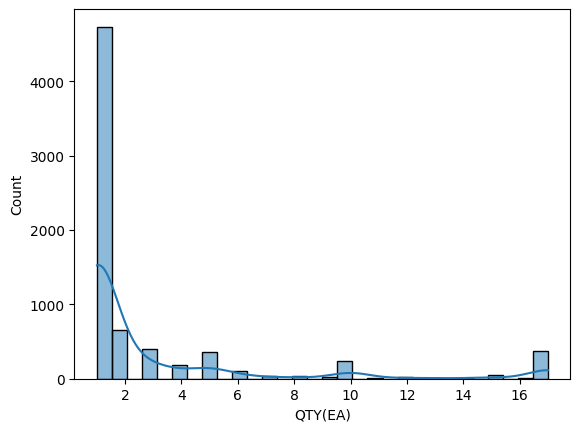

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['QTY(EA)'], bins=30, kde=True)
plt.show()


In [ ]:
import pandas as pd
# Add lag features
df['QTY(EA)_lag1'] = df['QTY(EA)'].shift(1)   # Lag 1: Previous day sales
df['QTY(EA)_lag7'] = df['QTY(EA)'].shift(7)   # Lag 7: Sales from 7 days ago
df['QTY(EA)_lag30'] = df['QTY(EA)'].shift(30) # Lag 30: Sales from 30 days ago

# Add rolling statistics
df['QTY(EA)_rolling_mean_7'] = df['QTY(EA)'].rolling(window=7).mean()  # 7-day rolling mean
df['QTY(EA)_rolling_sum_7'] = df['QTY(EA)'].rolling(window=7).sum()    # 7-day rolling sum
# Display the dataframe to see the lag features
print(df)
df.fillna(method='ffill', inplace=True)   # Replace NaN values with 0
print(df)

      QTY(EA)  Year  Month  Day  Weekday  Quarter  Sales Region_Colombo  \
0           1  2023      2    8        2        1                     0   
1           1  2022      9   22        3        3                     0   
2           1  2022      9   22        3        3                     0   
3           1  2022      9   22        3        3                     0   
4           1  2022     10   16        6        4                     0   
...       ...   ...    ...  ...      ...      ...                   ...   
7648        5  2024     10   29        1        4                     0   
7649        3  2024     10   29        1        4                     0   
7650        5  2024     10   29        1        4                     0   
7651        5  2024     10   29        1        4                     0   
7652        1  2024     10    2        2        4                     0   

      Sales Region_Direct  Sales Region_East  Sales Region_Exports  ...  \
0                       

<ipython-input-471-aa2217932054>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)   # Replace NaN values with 0


In [ ]:
# Verify dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7249 entries, 0 to 7652
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   QTY(EA)                       7249 non-null   int64         
 1   Year                          7249 non-null   int32         
 2   Month                         7249 non-null   int32         
 3   Day                           7249 non-null   int32         
 4   Weekday                       7249 non-null   int32         
 5   Quarter                       7249 non-null   int32         
 6   Sales Region_Colombo          7249 non-null   int64         
 7   Sales Region_Direct           7249 non-null   int64         
 8   Sales Region_East             7249 non-null   int64         
 9   Sales Region_Exports          7249 non-null   int64         
 10  Sales Region_Kandy            7249 non-null   int64         
 11  Sales Region_Key Accounts     7249 

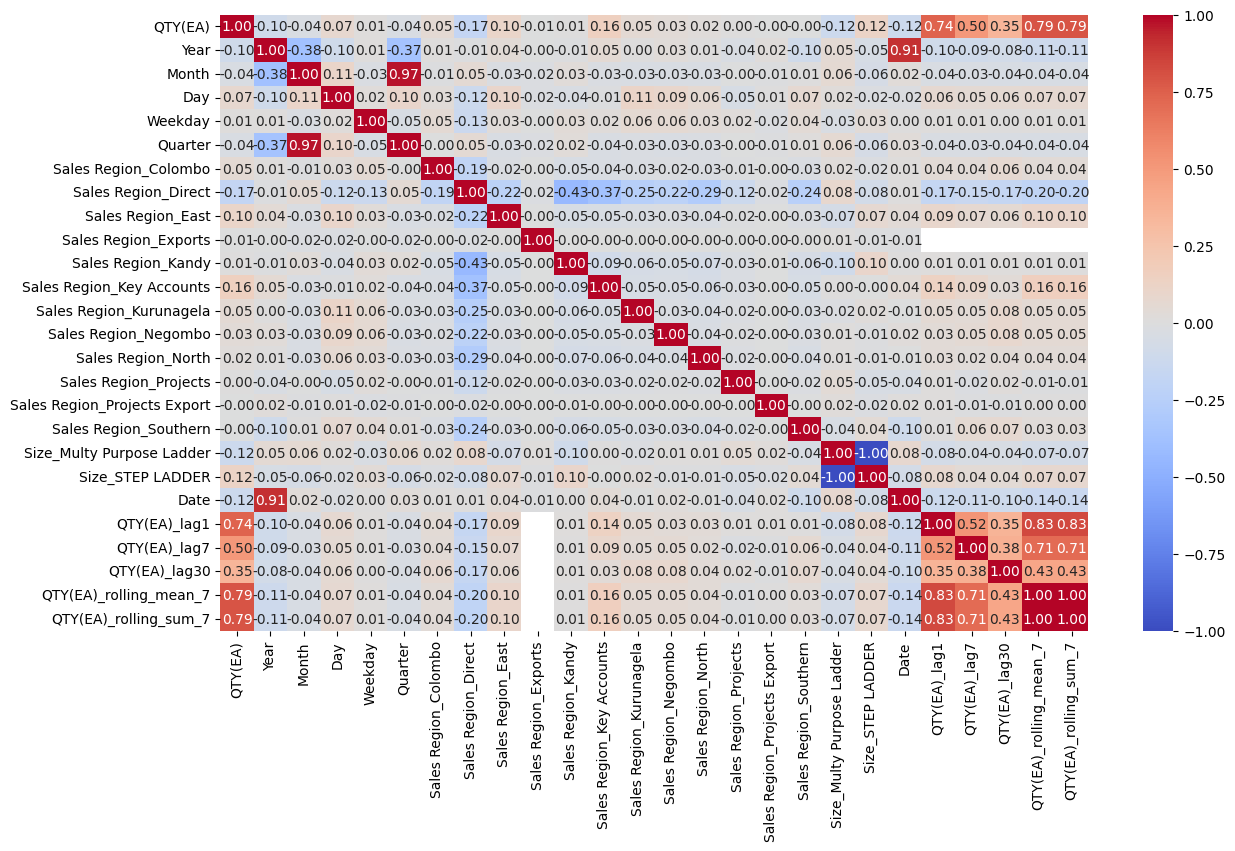

Highly Correlated Features with QTY(EA): Index(['QTY(EA)'], dtype='object')


In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.show()

# Find highly correlated features (threshold can be adjusted)
highly_correlated = corr_matrix.index[abs(corr_matrix['QTY(EA)']) > 0.8]
print(f"Highly Correlated Features with QTY(EA): {highly_correlated}")


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the numerical columns for scaling
numerical_cols = ['QTY(EA)', 'QTY(EA)_lag1', 'QTY(EA)_lag7', 'QTY(EA)_lag30',
                  'QTY(EA)_rolling_mean_7', 'QTY(EA)_rolling_sum_7']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [ ]:
# Drop the 'Date' column before training the model
X = df.drop(columns=['Date', 'QTY(EA)'])  # Drop Date and the target column QTY(EA)
y = df['QTY(EA)']  # The target variable is 'QTY(EA)'

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

# Initialize the XGBoost model with corrected regularization parameter
model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', alpha=0.1, reg_lambda=1)

# Train the model
model.fit(X_train, y_train)

# Predictions on both train and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model for the train set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate the model for the test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

# Display the evaluation metrics
print(f"📊 Sales (QTY) - Train Set:")
print(f"✅ MAE: {train_mae:.4f} | ✅ RMSE: {train_rmse:.4f} | ✅ R² Score: {train_r2:.4f}")
print("--------------------------------------------------")
print(f"📊 Sales (QTY) - Test Set:")
print(f"✅ MAE: {test_mae:.4f} | ✅ RMSE: {test_rmse:.4f} | ✅ R² Score: {test_r2:.4f}")


📊 Sales (QTY) - Train Set:
✅ MAE: 0.0865 | ✅ RMSE: 0.1763 | ✅ R² Score: 0.9696
--------------------------------------------------
📊 Sales (QTY) - Test Set:
✅ MAE: 0.2721 | ✅ RMSE: 0.5692 | ✅ R² Score: 0.6433


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from scipy.stats import uniform, randint

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 1000),  # Number of trees
    'max_depth': randint(3, 15),  # Depth of the trees
    'learning_rate': uniform(0.01, 0.2),  # Step size for each iteration
    'subsample': uniform(0.6, 0.4),  # Fraction of samples used for training each tree
    'colsample_bytree': uniform(0.6, 0.4),  # Fraction of features used for each tree
    'reg_alpha': uniform(0, 1),  # L1 regularization
    'reg_lambda': uniform(0, 1),  # L2 regularization
}

# Initialize the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

# Perform RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Train the model using the best parameters
best_model = random_search.best_estimator_

# Predictions on both train and test data
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluate the model for the train set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate the model for the test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

# Display the evaluation metrics
print(f"📊 Sales (QTY) - Train Set:")
print(f"✅ MAE: {train_mae:.4f} | ✅ RMSE: {train_rmse:.4f} | ✅ R² Score: {train_r2:.4f}")
print("--------------------------------------------------")
print(f"📊 Sales (QTY) - Test Set:")
print(f"✅ MAE: {test_mae:.4f} | ✅ RMSE: {test_rmse:.4f} | ✅ R² Score: {test_r2:.4f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'colsample_bytree': 0.707103693096442, 'learning_rate': 0.017987103726631273, 'max_depth': 7, 'n_estimators': 233, 'reg_alpha': 0.819532556598478, 'reg_lambda': 0.8117651201791594, 'subsample': 0.693060742470557}
Best Cross-Validation Score: -0.3140074677161773
📊 Sales (QTY) - Train Set:
✅ MAE: 0.1891 | ✅ RMSE: 0.3850 | ✅ R² Score: 0.8550
--------------------------------------------------
📊 Sales (QTY) - Test Set:
✅ MAE: 0.2525 | ✅ RMSE: 0.5149 | ✅ R² Score: 0.7081


In [ ]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
# print(f"Cross-validated MAE: {-scores.mean()}")


In [ ]:
# # Initialize the XGBoost model
# model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

In [ ]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'n_estimators': [100, 200, 300]
# }
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
# grid_search.fit(X_train, y_train)
# print("Best Parameters:", grid_search.best_params_)
